In [1]:
import nltk
import re
import numpy as np # linear algebra
import pandas as pd # data processing
import random
import seaborn as sns
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize


#import pandas_profiling

%matplotlib inline

In [2]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
raw_dataset=pd.read_csv('/content/drive/MyDrive/NLP project/Amazon_Unlocked_Mobile.csv')
raw_dataset.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [4]:
raw_dataset.tail()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0
413839,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,4,Only downside is that apparently Verizon no lo...,0.0


In [5]:
df=raw_dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413778 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


In [6]:
df.shape

(413840, 6)

In [7]:
df.describe()

,Price,Rating,Review Votes
count,407907.000000,413840.000000,401544.000000
mean,226.867155,3.819578,1.507237
std,273.006259,1.548216,9.163853
min,1.730000,1.000000,0.000000
25%,79.990000,3.000000,0.000000
50%,144.710000,5.000000,0.000000
75%,269.990000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


In [8]:
df=df[['Reviews','Rating']]

In [9]:
df.head()

,Reviews,Rating
0,I feel so LUCKY to have found this used (phone...,5
1,"nice phone, nice up grade from my pantach revu...",4
2,Very pleased,5
3,It works good but it goes slow sometimes but i...,4
4,Great phone to replace my lost phone. The only...,4


In [10]:
df.tail()

,Reviews,Rating
413835,another great deal great price,5
413836,Ok,3
413837,Passes every drop test onto porcelain tile!,5
413838,I returned it because it did not meet my needs...,3
413839,Only downside is that apparently Verizon no lo...,4


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Reviews  413778 non-null  object
 1   Rating   413840 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.3+ MB


In [12]:
df.isnull().sum() 

Reviews    62
Rating      0
dtype: int64

In [13]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413778 entries, 0 to 413839
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Reviews  413778 non-null  object
 1   Rating   413778 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ MB


In [14]:
df.isnull()      
# Returns a boolean matrix, if the value is NaN then True otherwise False
df.isnull().sum() 
# Returns the column names along with the number of NaN values in that particular column

Reviews    0
Rating     0
dtype: int64

In [15]:
df=df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413778 entries, 0 to 413777
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Reviews  413778 non-null  object
 1   Rating   413778 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.3+ MB


In [16]:
import nltk

In [17]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
Cstopwords=set(stopwords.words('english')+list(punctuation))
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()
def clean_review(review_column):
    review_corpus=[]
    for i in range(0,len(review_column)):
        review=review_column[i]
        review=re.sub('[^a-zA-Z]',' ',review)
        review=str(review).lower()
        review=word_tokenize(review)
        review=[stemmer.stem(w) for w in review if w not in Cstopwords]
        review=[lemma.lemmatize(w) for w in review ]
        review=' '.join(review)
        review_corpus.append(review)
    return review_corpus

In [19]:
review_column=df['Reviews']
review_corpus=clean_review(review_column)

In [20]:
df['clean_review']=review_corpus
df.tail(20)

,Reviews,Rating,clean_review
413758,They said phone was normal wear but it was a l...,1,said phone normal wear lie phone complet scrat...
413759,"You could shoot this out of a potato gun, and ...",5,could shoot potato gun proceed dislodg tree or...
413760,Bought this for my mother and she loves it. Gr...,5,bought mother love great flip phone
413761,"Excellent phone, as advertised. Love the push-...",5,excel phone advertis love push talk featur
413762,works great and picks up signal in place my ot...,4,work great pick signal place phone
413763,"Great phone. Large keys, best flip phone I hav...",5,great phone larg key best flip phone own
413764,"Pros...Works great, very durable, easy to navi...",5,pro work great durabl easi navig speaker fanta...
413765,just as described perfect for the price,5,describ perfect price
413766,Would not work,1,would work
413767,"Speaker phone doesn't work, but phone works good",3,speaker phone work phone work good


In [21]:
!pip install sumy
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.text_rank import TextRankSummarizer
from sumy.summarizers.luhn import LuhnSummarizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
#review summarization
def summarize_reviews(reviews):
  res=[]
  for text in reviews:
    parser = PlaintextParser.from_string(text,Tokenizer("english"))
    summarizer = LuhnSummarizer()
    summary =summarizer(parser.document,2)
    text_summary=""
    for sentence in summary:
      text_summary+=str(sentence)
    res.append(text_summary)
  return res

In [23]:
df['clean_summarized_review'] = summarize_reviews(df['clean_review'])
df.tail(20)

,Reviews,Rating,clean_review,clean_summarized_review
413758,They said phone was normal wear but it was a l...,1,said phone normal wear lie phone complet scrat...,said phone normal wear lie phone complet scrat...
413759,"You could shoot this out of a potato gun, and ...",5,could shoot potato gun proceed dislodg tree or...,could shoot potato gun proceed dislodg tree or...
413760,Bought this for my mother and she loves it. Gr...,5,bought mother love great flip phone,bought mother love great flip phone
413761,"Excellent phone, as advertised. Love the push-...",5,excel phone advertis love push talk featur,excel phone advertis love push talk featur
413762,works great and picks up signal in place my ot...,4,work great pick signal place phone,work great pick signal place phone
413763,"Great phone. Large keys, best flip phone I hav...",5,great phone larg key best flip phone own,great phone larg key best flip phone own
413764,"Pros...Works great, very durable, easy to navi...",5,pro work great durabl easi navig speaker fanta...,pro work great durabl easi navig speaker fanta...
413765,just as described perfect for the price,5,describ perfect price,describ perfect price
413766,Would not work,1,would work,would work
413767,"Speaker phone doesn't work, but phone works good",3,speaker phone work phone work good,speaker phone work phone work good


In [24]:
df['summarized_review'] = summarize_reviews(df['Reviews'])
df.tail(20)

,Reviews,Rating,clean_review,clean_summarized_review,summarized_review
413758,They said phone was normal wear but it was a l...,1,said phone normal wear lie phone complet scrat...,said phone normal wear lie phone complet scrat...,They said phone was normal wear but it was a l...
413759,"You could shoot this out of a potato gun, and ...",5,could shoot potato gun proceed dislodg tree or...,could shoot potato gun proceed dislodg tree or...,"You could shoot this out of a potato gun, and ..."
413760,Bought this for my mother and she loves it. Gr...,5,bought mother love great flip phone,bought mother love great flip phone,Bought this for my mother and she loves it.Gre...
413761,"Excellent phone, as advertised. Love the push-...",5,excel phone advertis love push talk featur,excel phone advertis love push talk featur,"Excellent phone, as advertised.Love the push-t..."
413762,works great and picks up signal in place my ot...,4,work great pick signal place phone,work great pick signal place phone,works great and picks up signal in place my ot...
413763,"Great phone. Large keys, best flip phone I hav...",5,great phone larg key best flip phone own,great phone larg key best flip phone own,"Great phone.Large keys, best flip phone I have..."
413764,"Pros...Works great, very durable, easy to navi...",5,pro work great durabl easi navig speaker fanta...,pro work great durabl easi navig speaker fanta...,"Pros...Works great, very durable, easy to navi..."
413765,just as described perfect for the price,5,describ perfect price,describ perfect price,just as described perfect for the price
413766,Would not work,1,would work,would work,Would not work
413767,"Speaker phone doesn't work, but phone works good",3,speaker phone work phone work good,speaker phone work phone work good,"Speaker phone doesn't work, but phone works good"


In [48]:
df['Reviews'][15]

'Had this phone before and loved it but was not working so I got this phone. One thing is the SD card slot does not open up when I try to access it in file managment, even does not show up on the computer. The card is fine was able to open on another phone. Trying to trouble shoot it for now.'

In [49]:
df['summarized_review'][15]

'One thing is the SD card slot does not open up when I try to access it in file managment, even does not show up on the computer.The card is fine was able to open on another phone.'

## **Sentiment Analysis**

## **Multinomial naive bayes**

In [36]:
#df = df.sample(frac=0.1, random_state=0) 
# Drop missing values
df.dropna(inplace=True)
# Remove any 'neutral' ratings equal to 3
df = df[df['Rating'] != 3]
# Encode 4s and 5s as 1 (positive sentiment) and 1s and 2s as 0 (negative sentiment)
df['Sentiment'] = np.where(df['Rating'] > 3, 1, 0)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Reviews,Rating,clean_review,clean_summarized_review,summarized_review,Product Name,review,Sentiment
0,I feel so LUCKY to have found this used (phone...,5,feel lucki found use phone u use hard phone li...,feel lucki found use phone u use hard phone li...,I feel so LUCKY to have found this used (phone...,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",I feel so LUCKY to have found this used (phone...,1
1,"nice phone, nice up grade from my pantach revu...",4,nice phone nice grade pantach revu clean set e...,nice phone nice grade pantach revu clean set e...,"nice phone, nice up grade from my pantach revu...","""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",I feel so LUCKY to have found this used (phone...,1
2,Very pleased,5,plea,plea,Very pleased,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",I feel so LUCKY to have found this used (phone...,1
3,It works good but it goes slow sometimes but i...,4,work good goe slow sometim good phone love,work good goe slow sometim good phone love,It works good but it goes slow sometimes but i...,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",I feel so LUCKY to have found this used (phone...,1
4,Great phone to replace my lost phone. The only...,4,great phone replac lost phone thing volum butt...,great phone replac lost phone thing volum butt...,Great phone to replace my lost phone.Other tha...,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",I feel so LUCKY to have found this used (phone...,1


In [26]:
# Split data into training set and validation
X_train, X_test, y_train, y_test = train_test_split(df['clean_summarized_review'], df['Sentiment'], test_size=0.20, random_state=0)

print('Load %d training examples and %d validation examples. \n' %(X_train.shape[0],X_test.shape[0]))
print('Show a review in the training set : \n', X_train.iloc[10])

Load 305612 training examples and 76403 validation examples. 

Show a review in the training set : 
 work pay fix


In [27]:
# Fit and transform the training data to a document-term matrix using CountVectorizer
countVect = CountVectorizer() 
X_train_countVect = countVect.fit_transform(X_train)
print("Number of features : %d \n" %len(countVect.get_feature_names()))
print("Show some feature names : \n", countVect.get_feature_names()[::1000])

# Train MultinomialNB classifier
mnb = MultinomialNB()
mnb.fit(X_train_countVect, y_train)

Number of features : 39510 

Show some feature names : 
 ['aa', 'alin', 'argentinai', 'barra', 'boarder', 'cameraagain', 'choic', 'conectividad', 'cumana', 'designservic', 'dorado', 'enganosa', 'expectingmiss', 'flawlesslyther', 'gbsd', 'guanacast', 'holux', 'inexpensiv', 'japanes', 'leastl', 'ly', 'might', 'mybullfrog', 'ntsc', 'outershel', 'pharmacist', 'powercor', 'pueden', 'recod', 'returnung', 'scoutsettingssetupslack', 'signanon', 'sorrynot', 'submenu', 'tennesse', 'tong', 'unclock', 'variat', 'websiteenjoyricardo', 'xele']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


MultinomialNB()

In [28]:
def modelEvaluation(predictions):
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions)))
    print("\nClassification report : \n", metrics.classification_report(y_test, predictions))

In [29]:
# Evaluate the model on validaton set
predictions = mnb.predict(countVect.transform(X_test))
modelEvaluation(predictions)


Accuracy on validation set: 0.9141

AUC score : 0.8726

Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.79      0.82     19465
           1       0.93      0.96      0.94     56938

    accuracy                           0.91     76403
   macro avg       0.90      0.87      0.88     76403
weighted avg       0.91      0.91      0.91     76403



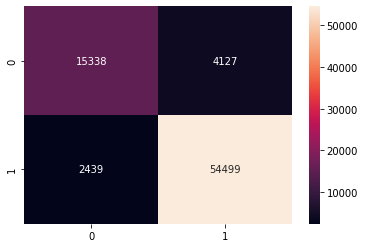

In [30]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True,fmt='g')

In [31]:
a=mnb.predict(countVect.transform(["worst mobile dont like it"]))
a[0]

0

In [32]:
a=mnb.predict(countVect.transform(["excellent mobile like it"]))
a[0]

1

In [33]:
df['Brand Name']=raw_dataset['Brand Name']
df
# df['Product Name']=raw_dataset['Product Name']

,Reviews,Rating,clean_review,clean_summarized_review,summarized_review,Sentiment,Brand Name
0,I feel so LUCKY to have found this used (phone...,5,feel lucki found use phone u use hard phone li...,feel lucki found use phone u use hard phone li...,I feel so LUCKY to have found this used (phone...,1,Samsung
1,"nice phone, nice up grade from my pantach revu...",4,nice phone nice grade pantach revu clean set e...,nice phone nice grade pantach revu clean set e...,"nice phone, nice up grade from my pantach revu...",1,Samsung
2,Very pleased,5,plea,plea,Very pleased,1,Samsung
3,It works good but it goes slow sometimes but i...,4,work good goe slow sometim good phone love,work good goe slow sometim good phone love,It works good but it goes slow sometimes but i...,1,Samsung
4,Great phone to replace my lost phone. The only...,4,great phone replac lost phone thing volum butt...,great phone replac lost phone thing volum butt...,Great phone to replace my lost phone.Other tha...,1,Samsung
...,...,...,...,...,...,...,...
413770,good rugged phone that has a long-lasting batt...,4,good rug phone long last batteryif need screen...,good rug phone long last batteryif need screen...,good rugged phone that has a long-lasting batt...,1,Samsung
413772,used hard,1,use hard,use hard,used hard,0,Samsung
413773,another great deal great price,5,anoth great deal great price,anoth great deal great price,another great deal great price,1,Samsung
413775,Passes every drop test onto porcelain tile!,5,pas everi drop test onto porcelain tile,pas everi drop test onto porcelain tile,Passes every drop test onto porcelain tile!,1,Samsung


In [34]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from wordcloud import WordCloud
def create_word_cloud(brand, sentiment):
  df_brand = df.loc[df['Brand Name'].isin([brand])]
  df_brand_sample = df_brand.sample(frac=0.5)
  word_cloud_collection = ''
        
  if sentiment == 1:
    df_reviews = df_brand_sample[df_brand_sample["Sentiment"]==1]["Reviews"]
            
  if sentiment == 0:
    df_reviews = df_brand_sample[df_brand_sample["Sentiment"]==0]["Reviews"]
            
  for val in df_reviews.str.lower():
    tokens = nltk.word_tokenize(val)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
  for words in tokens:
    word_cloud_collection = word_cloud_collection + words + ' '

  wordcloud = WordCloud(max_font_size=50, width=500, height=300).generate(word_cloud_collection)
  # plt.figure(figsize=(20,20))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


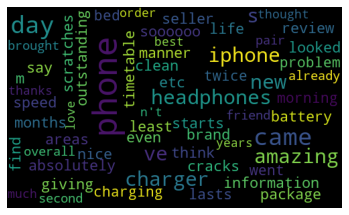

In [113]:
create_word_cloud(brand='Apple', sentiment=1)

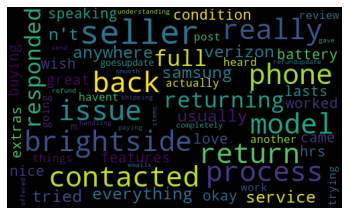

In [114]:
create_word_cloud(brand='Samsung',sentiment=0)

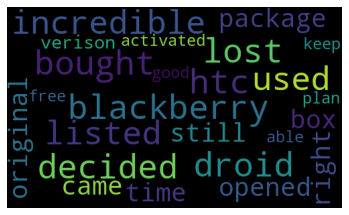

In [116]:
create_word_cloud(brand='HTC',sentiment=1)

## **Random forest**

In [117]:
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False):
    text = BeautifulSoup(raw_text, 'lxml').get_text()
    letters_only = re.sub("[^a-zA-Z]", " ", text)
    words = letters_only.lower().split() 
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    if stemming==True:
        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
    if split_text==True:
        return (words)
    return( " ".join(words))

In [119]:
from gensim.models import Word2Vec
# Split review text into parsed sentences uisng NLTK's punkt tokenizer
# nltk.download()
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def parseSent(review, tokenizer, remove_stopwords=False):
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(cleanText(raw_sentence, remove_stopwords, split_text=True))
    return sentences

# Parse each review in the training set into sentences
sentences = []
for review in X_train:
    sentences += parseSent(review, tokenizer)
    
print('%d parsed sentence in the training set\n'  %len(sentences))
print('Show a parsed sentence in the training set : \n',  sentences[10])

304738 parsed sentence in the training set

Show a parsed sentence in the training set : 
 ['work', 'pay', 'fix']


In [120]:
# Fit parsed sentences to Word2Vec model 
num_features = 300            
min_word_count = 10                
num_workers = 4       
context = 10                                                                                          
downsampling = 1e-3 
print("Training Word2Vec model ...\n")
w2v = Word2Vec(sentences, workers=num_workers, size=num_features, min_count = min_word_count,window = context, sample = downsampling)
w2v.init_sims(replace=True)
w2v.save("w2v_300features_10minwordcounts_10context") #save trained word2vec model
print("Number of words in the vocabulary list : %d \n" %len(w2v.wv.index2word)) 
print("Show first 10 words in the vocalbulary list  vocabulary list: \n", w2v.wv.index2word[0:10])

Training Word2Vec model ...

Number of words in the vocabulary list : 9087 

Show first 10 words in the vocalbulary list  vocabulary list: 
 ['phone', 'work', 'great', 'use', 'good', 'one', 'like', 'love', 'get', 'screen']


In [121]:
# Transfrom the training data into feature vectors
def makeFeatureVec(review, model, num_features):
    featureVec = np.zeros((num_features,),dtype="float32")
    nwords = 0.
    index2word_set = set(model.wv.index2word)
    isZeroVec = True
    for word in review:
        if word in index2word_set: 
            nwords = nwords + 1.
            featureVec = np.add(featureVec, model[word])
            isZeroVec = False
    if isZeroVec == False:
        featureVec = np.divide(featureVec, nwords)
    return featureVec


def getAvgFeatureVecs(reviews, model, num_features):
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        reviewFeatureVecs[counter] = makeFeatureVec(review, model,num_features)
        counter = counter + 1
    return reviewFeatureVecs

In [122]:
# Get feature vectors for training set
X_train_cleaned = []
for review in X_train:
    X_train_cleaned.append(cleanText(review, remove_stopwords=True, split_text=True))
trainVector = getAvgFeatureVecs(X_train_cleaned, w2v, num_features)
print("Training set : %d feature vectors with %d dimensions" %trainVector.shape)


# Get feature vectors for validation set
X_test_cleaned = []
for review in X_test:
    X_test_cleaned.append(cleanText(review, remove_stopwords=True, split_text=True))
testVector = getAvgFeatureVecs(X_test_cleaned, w2v, num_features)
print("Validation set : %d feature vectors with %d dimensions" %testVector.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


Training set : 305612 feature vectors with 300 dimensions
Validation set : 76403 feature vectors with 300 dimensions


In [125]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(trainVector, y_train)
predictions = rf.predict(testVector)
modelEvaluation(predictions)


Accuracy on validation set: 0.9691

AUC score : 0.9542

Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.92      0.94     19465
           1       0.97      0.98      0.98     56938

    accuracy                           0.97     76403
   macro avg       0.96      0.95      0.96     76403
weighted avg       0.97      0.97      0.97     76403



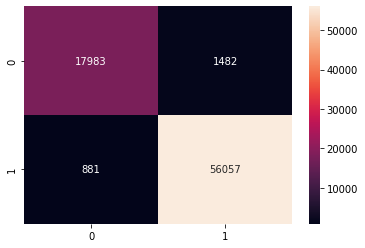

In [126]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True,fmt='g')

In [127]:
res = rf.predict(getAvgFeatureVecs(["good mobile"], w2v, num_features))
res[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


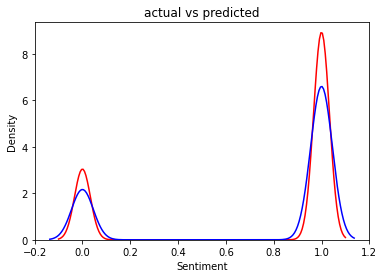

In [158]:
import seaborn as sns
# plt.figure(figsize=(5, 7))
ax = sns.distplot(df['Sentiment'], hist=False, color="r", label="Actual review")
sns.distplot(predictions, hist=False, color="b", label="predicted review" , ax=ax)
plt.title('actual vs predicted')
plt.show()
plt.close()

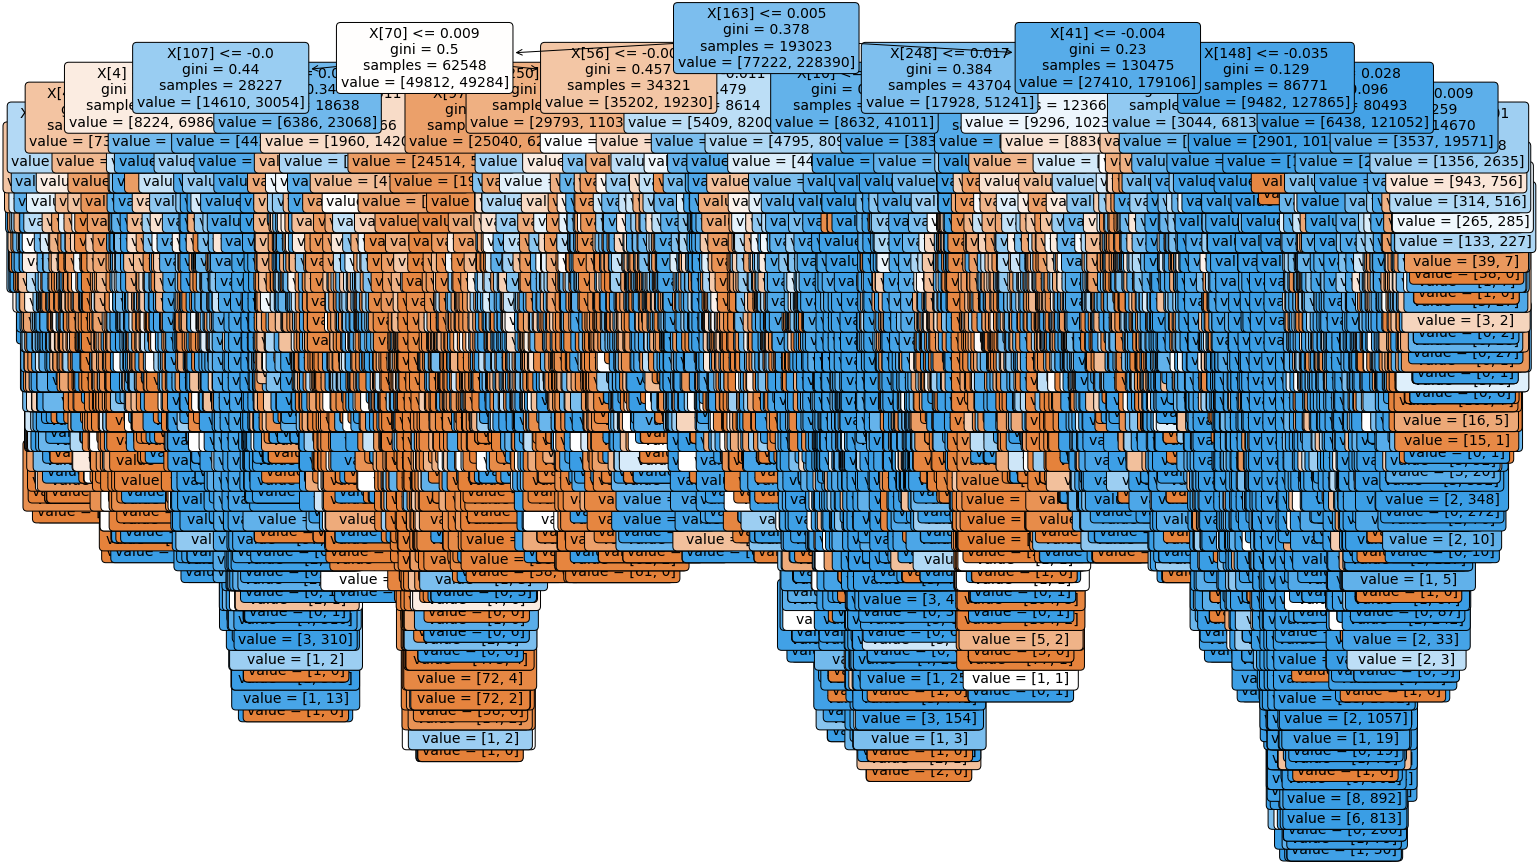

In [142]:
import pydot
# Pull out one tree from the forest
Tree = rf.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True, rounded=True, fontsize=14);

## **LSTM**

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline

from bs4 import BeautifulSoup  
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag

import logging
from gensim.models import word2vec
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors

from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
#from keras.layers.embeddings import Embedding
#from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K
#from keras.layers.embeddings import Embedding

from keras import preprocessing
import keras
from keras.utils import pad_sequences
# from keras.preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences
from keras import Sequential
import keras as keras

from tensorflow.python.keras.layers import Input, Dense
from keras.layers import *
from keras import layers
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K
from keras.layers import *
from keras.models import *
import keras.backend as K

In [129]:
top_words = 20000 
maxlen = 100 
batch_size = 32
nb_classes = 2
nb_epoch = 3

# Vectorize X_train and X_test to 2D tensor
tokenizer = Tokenizer(nb_words=top_words)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
X_train_seq = pad_sequences(sequences_train, maxlen=maxlen)
X_test_seq = pad_sequences(sequences_test, maxlen=maxlen)
# one-hot encoding of y_train and y_test
y_train_seq = np_utils.to_categorical(y_train, nb_classes)
y_test_seq = np_utils.to_categorical(y_test, nb_classes)

print('X_train shape:', X_train_seq.shape) 
print('X_test shape:', X_test_seq.shape)
print('y_train shape:', y_train_seq.shape)
print('y_test shape:', y_test_seq.shape)

/usr/local/lib/python3.7/dist-packages/keras/preprocessing/text.py:234: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


X_train shape: (305612, 100)
X_test shape: (76403, 100)
y_train shape: (305612, 2)
y_test shape: (76403, 2)


In [130]:
model1 = Sequential()
model1.add(layers.Embedding(top_words, 128))
model1.add(LSTM(128)) 
model1.add(Dense(nb_classes))
model1.add(Activation('softmax'))
model1.summary()
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model1.fit(X_train_seq, y_train_seq, batch_size=batch_size, epochs=3, verbose=1)
score = model1.evaluate(X_test_seq, y_test_seq, batch_size=batch_size)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
 activation (Activation)     (None, 2)                 0         
                                                                 
Total params: 2,691,842
Trainable params: 2,691,842
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
9551/9551 [==============================] - 1811s 189ms/step - loss: 0.1740 - accuracy: 0.9343
Epoch 2/3
9551/9551 [==============================] - 1828s 191ms/step 

In [37]:
data = df
data

,Reviews,Rating,clean_review,clean_summarized_review,summarized_review,Product Name,review,Sentiment
0,I feel so LUCKY to have found this used (phone...,5,feel lucki found use phone u use hard phone li...,feel lucki found use phone u use hard phone li...,I feel so LUCKY to have found this used (phone...,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",I feel so LUCKY to have found this used (phone...,1
1,"nice phone, nice up grade from my pantach revu...",4,nice phone nice grade pantach revu clean set e...,nice phone nice grade pantach revu clean set e...,"nice phone, nice up grade from my pantach revu...","""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",I feel so LUCKY to have found this used (phone...,1
2,Very pleased,5,plea,plea,Very pleased,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",I feel so LUCKY to have found this used (phone...,1
3,It works good but it goes slow sometimes but i...,4,work good goe slow sometim good phone love,work good goe slow sometim good phone love,It works good but it goes slow sometimes but i...,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",I feel so LUCKY to have found this used (phone...,1
4,Great phone to replace my lost phone. The only...,4,great phone replac lost phone thing volum butt...,great phone replac lost phone thing volum butt...,Great phone to replace my lost phone.Other tha...,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",I feel so LUCKY to have found this used (phone...,1
...,...,...,...,...,...,...,...,...
413770,good rugged phone that has a long-lasting batt...,4,good rug phone long last batteryif need screen...,good rug phone long last batteryif need screen...,good rugged phone that has a long-lasting batt...,Samsung Convoy U640 Phone for Verizon Wireless...,awesome Love this phone. It's got a wonderfull...,1
413772,used hard,1,use hard,use hard,used hard,Samsung Convoy U640 Phone for Verizon Wireless...,awesome Love this phone. It's got a wonderfull...,0
413773,another great deal great price,5,anoth great deal great price,anoth great deal great price,another great deal great price,Samsung Convoy U640 Phone for Verizon Wireless...,awesome Love this phone. It's got a wonderfull...,1
413775,Passes every drop test onto porcelain tile!,5,pas everi drop test onto porcelain tile,pas everi drop test onto porcelain tile,Passes every drop test onto porcelain tile!,Samsung Convoy U640 Phone for Verizon Wireless...,awesome Love this phone. It's got a wonderfull...,1


In [38]:
data['Product Name'] = raw_dataset['Product Name']
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Reviews,Rating,clean_review,clean_summarized_review,summarized_review,Product Name,review,Sentiment
0,I feel so LUCKY to have found this used (phone...,5,feel lucki found use phone u use hard phone li...,feel lucki found use phone u use hard phone li...,I feel so LUCKY to have found this used (phone...,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",I feel so LUCKY to have found this used (phone...,1
1,"nice phone, nice up grade from my pantach revu...",4,nice phone nice grade pantach revu clean set e...,nice phone nice grade pantach revu clean set e...,"nice phone, nice up grade from my pantach revu...","""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",I feel so LUCKY to have found this used (phone...,1
2,Very pleased,5,plea,plea,Very pleased,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",I feel so LUCKY to have found this used (phone...,1
3,It works good but it goes slow sometimes but i...,4,work good goe slow sometim good phone love,work good goe slow sometim good phone love,It works good but it goes slow sometimes but i...,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",I feel so LUCKY to have found this used (phone...,1
4,Great phone to replace my lost phone. The only...,4,great phone replac lost phone thing volum butt...,great phone replac lost phone thing volum butt...,Great phone to replace my lost phone.Other tha...,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",I feel so LUCKY to have found this used (phone...,1
...,...,...,...,...,...,...,...,...
413770,good rugged phone that has a long-lasting batt...,4,good rug phone long last batteryif need screen...,good rug phone long last batteryif need screen...,good rugged phone that has a long-lasting batt...,Samsung Convoy U640 Phone for Verizon Wireless...,awesome Love this phone. It's got a wonderfull...,1
413772,used hard,1,use hard,use hard,used hard,Samsung Convoy U640 Phone for Verizon Wireless...,awesome Love this phone. It's got a wonderfull...,0
413773,another great deal great price,5,anoth great deal great price,anoth great deal great price,another great deal great price,Samsung Convoy U640 Phone for Verizon Wireless...,awesome Love this phone. It's got a wonderfull...,1
413775,Passes every drop test onto porcelain tile!,5,pas everi drop test onto porcelain tile,pas everi drop test onto porcelain tile,Passes every drop test onto porcelain tile!,Samsung Convoy U640 Phone for Verizon Wireless...,awesome Love this phone. It's got a wonderfull...,1


In [39]:
# average ratings of a product
data['review'] = data.groupby(by=['Product Name'])['Reviews'].transform(lambda x : ' '.join(x))
  
#agg({"Rating":"mean"})
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Reviews,Rating,clean_review,clean_summarized_review,summarized_review,Product Name,review,Sentiment
0,I feel so LUCKY to have found this used (phone...,5,feel lucki found use phone u use hard phone li...,feel lucki found use phone u use hard phone li...,I feel so LUCKY to have found this used (phone...,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",I feel so LUCKY to have found this used (phone...,1
1,"nice phone, nice up grade from my pantach revu...",4,nice phone nice grade pantach revu clean set e...,nice phone nice grade pantach revu clean set e...,"nice phone, nice up grade from my pantach revu...","""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",I feel so LUCKY to have found this used (phone...,1
2,Very pleased,5,plea,plea,Very pleased,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",I feel so LUCKY to have found this used (phone...,1
3,It works good but it goes slow sometimes but i...,4,work good goe slow sometim good phone love,work good goe slow sometim good phone love,It works good but it goes slow sometimes but i...,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",I feel so LUCKY to have found this used (phone...,1
4,Great phone to replace my lost phone. The only...,4,great phone replac lost phone thing volum butt...,great phone replac lost phone thing volum butt...,Great phone to replace my lost phone.Other tha...,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",I feel so LUCKY to have found this used (phone...,1
...,...,...,...,...,...,...,...,...
413770,good rugged phone that has a long-lasting batt...,4,good rug phone long last batteryif need screen...,good rug phone long last batteryif need screen...,good rugged phone that has a long-lasting batt...,Samsung Convoy U640 Phone for Verizon Wireless...,awesome Love this phone. It's got a wonderfull...,1
413772,used hard,1,use hard,use hard,used hard,Samsung Convoy U640 Phone for Verizon Wireless...,awesome Love this phone. It's got a wonderfull...,0
413773,another great deal great price,5,anoth great deal great price,anoth great deal great price,another great deal great price,Samsung Convoy U640 Phone for Verizon Wireless...,awesome Love this phone. It's got a wonderfull...,1
413775,Passes every drop test onto porcelain tile!,5,pas everi drop test onto porcelain tile,pas everi drop test onto porcelain tile,Passes every drop test onto porcelain tile!,Samsung Convoy U640 Phone for Verizon Wireless...,awesome Love this phone. It's got a wonderfull...,1


In [23]:
data['review'][0]

"I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!! nice phone, nice up grade from my pantach revue. Very clean set up and easy set up. never had an android phone but they are fantastic to say the least. perfect size for surfing and social media. great phone samsung Very pleased It works good but it goes slow sometimes but its a very good phone I love it Great phone to replace my lost phone. The only thing is the volume up button does not work, but I can still go into settings to adjust. Other than that, it does the job until I am eligible to upgrade my phone again.Thaanks! I already had a phone with problems... I know it stated it was used, but dang, it did not state

In [24]:
data['Reviews'][0]

"I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!"

In [28]:
!git clone https://github.com/huggingface/transformers \
&& cd transformers \
&& git checkout a3085020ed0d81d4903c50967687192e3101e770 

!pip install ./transformers
!pip install tensorboardX

fatal: destination path 'transformers' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./transformers
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for transformers: filename=transformers-2.3.0-py3-none-any.whl size=458565 sha256=a0e171f4634a8a5fde87cb93ac95348f964d930113287738b1629dec61522af2
  Stored in directory: /tmp/pip-ephem-wheel-cache-u1axn4lz/wheels/49/62/f4/6730819eed4e6468662b1519bf3bf46419b2335990c77f8767
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: tra

In [29]:
!mkdir dataset \
&& cd dataset \
&& wget https://rajpurkar.github.io/SQuAD-explorer/dataset/train-v2.0.json \
&& wget https://rajpurkar.github.io/SQuAD-explorer/dataset/dev-v2.0.json

mkdir: cannot create directory ‘dataset’: File exists


In [30]:
!export SQUAD_DIR=/content/dataset \
&& python transformers/examples/run_squad.py \
  --model_type albert \
  --model_name_or_path albert-base-v2 \
  --do_train \
  --do_eval \
  --do_lower_case \
  --train_file $SQUAD_DIR/train-v2.0.json \
  --predict_file $SQUAD_DIR/dev-v2.0.json \
  --per_gpu_train_batch_size 12 \
  --learning_rate 3e-5 \
  --num_train_epochs 1.0 \
  --max_seq_length 384 \
  --doc_stride 128 \
  --output_dir /content/model_output \
  --save_steps 1000 \
  --threads 4 \
  --version_2_with_negative 

Traceback (most recent call last):
  File "transformers/examples/run_squad.py", line 830, in <module>
    main()
  File "transformers/examples/run_squad.py", line 768, in main
    train_dataset = load_and_cache_examples(args, tokenizer, evaluate=False, output_examples=False)
  File "transformers/examples/run_squad.py", line 439, in load_and_cache_examples
    features_and_dataset = torch.load(cached_features_file)
  File "/usr/local/lib/python3.7/dist-packages/torch/serialization.py", line 713, in load
    return _legacy_load(opened_file, map_location, pickle_module, **pickle_load_args)
  File "/usr/local/lib/python3.7/dist-packages/torch/serialization.py", line 920, in _legacy_load
    magic_number = pickle_module.load(f, **pickle_load_args)
EOFError: Ran out of input


In [31]:
import os
import torch
import time
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

from transformers import (
    AlbertConfig,
    AlbertForQuestionAnswering,
    AlbertTokenizer,
    squad_convert_examples_to_features
)

from transformers.data.processors.squad import SquadResult, SquadV2Processor, SquadExample

from transformers.data.metrics.squad_metrics import compute_predictions_logits

# READER NOTE: Set this flag to use own model, or use pretrained model in the Hugging Face repository
use_own_model = False

if use_own_model:
  model_name_or_path = "/content/model_output"
else:
  model_name_or_path = "ktrapeznikov/albert-xlarge-v2-squad-v2"

output_dir = ""

# Config
n_best_size = 1
max_answer_length = 30
do_lower_case = True
null_score_diff_threshold = 0.0

def to_list(tensor):
    return tensor.detach().cpu().tolist()

# Setup model
config_class, model_class, tokenizer_class = (
    AlbertConfig, AlbertForQuestionAnswering, AlbertTokenizer)
config = config_class.from_pretrained(model_name_or_path)
tokenizer = tokenizer_class.from_pretrained(
    model_name_or_path, do_lower_case=True)
model = model_class.from_pretrained(model_name_or_path, config=config)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device)

processor = SquadV2Processor()

def run_prediction(question_texts, context_text):
    """Setup function to compute predictions"""
    examples = []

    for i, question_text in enumerate(question_texts):
        example = SquadExample(
            qas_id=str(i),
            question_text=question_text,
            context_text=context_text,
            answer_text=None,
            start_position_character=None,
            title="Predict",
            is_impossible=False,
            answers=None,
        )

        examples.append(example)

    features, dataset = squad_convert_examples_to_features(
        examples=examples,
        tokenizer=tokenizer,
        max_seq_length=384,
        doc_stride=128,
        max_query_length=64,
        is_training=False,
        return_dataset="pt",
        threads=1,
    )

    eval_sampler = SequentialSampler(dataset)
    eval_dataloader = DataLoader(dataset, sampler=eval_sampler, batch_size=10)

    all_results = []

    for batch in eval_dataloader:
        model.eval()
        batch = tuple(t.to(device) for t in batch)

        with torch.no_grad():
            inputs = {
                "input_ids": batch[0],
                "attention_mask": batch[1],
                "token_type_ids": batch[2],
            }

            example_indices = batch[3]

            outputs = model(**inputs)

            for i, example_index in enumerate(example_indices):
                eval_feature = features[example_index.item()]
                unique_id = int(eval_feature.unique_id)

                output = [to_list(output[i]) for output in outputs]

                start_logits, end_logits = output
                result = SquadResult(unique_id, start_logits, end_logits)
                all_results.append(result)

    output_prediction_file = "predictions.json"
    output_nbest_file = "nbest_predictions.json"
    output_null_log_odds_file = "null_predictions.json"

    predictions = compute_predictions_logits(
        examples,
        features,
        all_results,
        n_best_size,
        max_answer_length,
        do_lower_case,
        output_prediction_file,
        output_nbest_file,
        output_null_log_odds_file,
        False,  # verbose_logging
        True,  # version_2_with_negative
        null_score_diff_threshold,
        tokenizer,
    )

    return predictions

Downloading:   0%|          | 0.00/717 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/760k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/235M [00:00<?, ?B/s]

In [40]:
ques = ["is it good product ?"]
corpus = df['Reviews'][0]
predictions = run_prediction(ques, corpus)

add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6026.30it/s]


In [44]:
for i in ques:
  print(i)
#print(predictions)
for key in predictions.keys():
  print(predictions[key])

is it good product ?
recommend this seller very highly & would but from them again!!


In [33]:
for key in predictions.keys():
  print(predictions[key])

recommend this seller very highly & would but from them again!!


In [42]:
ref=df.head(1)
ref

,Reviews,Rating,clean_review,clean_summarized_review,summarized_review,Product Name,review,Sentiment
0,I feel so LUCKY to have found this used (phone...,5,feel lucki found use phone u use hard phone li...,feel lucki found use phone u use hard phone li...,I feel so LUCKY to have found this used (phone...,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",I feel so LUCKY to have found this used (phone...,1


In [78]:
faq ={}
for idx, row in ref.iterrows():
    product = row['Product Name']
    corpus = row['review']
    if(row['Sentiment']==0):
      questions=["why did you buy this?","what is the problem"]
    else:
     questions=["can i buy this?","what do you like in the phone?","how does the phone work?"]
    pred = run_prediction(questions, corpus)
    faq[product]=pred

add example index and unique id: 100%|██████████| 3/3 [00:00<00:00, 18236.10it/s]


In [79]:
ans=[]
for id in faq.keys():
  # print(id)
  # ans = faq.get(id)
  for keys, values in faq.get(id).items(): 
    ans.append(values)

In [80]:
for i in range(0,len(questions)):
  print(questions[i])
  print(ans[i])
  print("\n")

can i buy this?
I wouldn't suggest you buy anything from them.


what do you like in the phone?



how does the phone work?
wonderful




In [81]:
faq

{'"CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN': OrderedDict([('0',
               "I wouldn't suggest you buy anything from them."),
              ('1', ''),
              ('2', 'wonderful')])}

In [83]:
for i in ques:
  print(i)
#print(predictions)
for key in predictions.keys():
  print(predictions[key])

is it good product ?
recommend this seller very highly & would but from them again!!


In [99]:
products = df.groupby(by=['Product Name'], as_index=False).agg({"Rating":"mean"})
products

,Product Name,Rating
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",3.787879
1,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",4.275362
2,'ATT Wireless LG CU720 Shine for in Red',3.000000
3,((Unlocked))BlackBerry Bold 9650 Unlocked Clea...,4.285714
4,"(LANDVO) 5.0"" Capacitive Touch MTK6582 Quad Co...",4.363636
...,...,...
4380,"verykool s5017 Dorado 4G HSPA+ 5.0"" IPS LCD Un...",3.550000
4381,"verykool s505 Spark 5.0"" IPS TFT LCD 1.3GHz Qu...",4.750000
4382,verykool s5510 Juno HSPA+ Factory Unlocked GSM...,3.559322
4383,"verykool s5511 Juno Quatro 5.5"" LCD 4G Unlocke...",4.100000


In [85]:
!pip install leven
!python -m spacy download en_core_web_lg
from leven import levenshtein
import spacy
nlp = spacy.load('en_core_web_lg')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 7.1 MB/s 
  Created wheel for leven: filename=leven-1.0.4-cp37-cp37m-linux_x86_64.whl size=55497 sha256=7a69537800b9af28ad65514d352f57faa4690b2e2c8f73a3e69b0db998fc1870
  Stored in directory: /root/.cache/pip/wheels/27/d5/b1/b36dd23f85aa662f19b11ef6069d5dc66643dfc1831d9f2bf5
Successfully built leven
2022-11-28 08:05:48.138462: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 11 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [92]:
print(df.iloc[152000]['Product Name'])

BLU WIN HD LTE - 5.0" Windows Smartphone -GSM Unlocked - Grey


In [93]:
search_product = input()

BLU WIN HD LTE - 5.0" Windows Smartphone -GSM Unlocked - Grey


In [100]:
productsList = products.iloc[:,0].tolist()
productsList.remove(search_product)
recommendations={}
for p in productsList:
  recommendations[p]=levenshtein(search_product,p)

In [101]:
recommendations

{'"CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN': 92,
 '"Nokia Asha 302 Unlocked GSM Phone with 3.2MP Camera, Video, QWERTY Keyboard, Wi-Fi, Bluetooth, FM Radio, SNS Integration, MP3/MP4 Player and microSD Slot - White International Version/Warranty': 165,
 "'ATT Wireless LG CU720 Shine for in Red'": 48,
 '((Unlocked))BlackBerry Bold 9650 Unlocked Clean ESN Smartphone non camera': 62,
 '(LANDVO) 5.0" Capacitive Touch MTK6582 Quad Core Android 4.2.2 3G Phone 512MB RAM 4GB ROM 2MP CAM WiFi GPS - Black': 92,
 "10.6'' Inch E-passion Unlocked Smart Phone +Tablet='' Phablet'' Android 4.4 Kitkat Gsm,Wcdma Tablet Phone - Unlocked Dual Sim Card,Quad Core- At&t, Cricket,Straight Talk ,T-Mobile,H20,Net10 3g Phone Tablet 2G Ram 32G Rom[Free Leather Case]": 208,
 '2.45 " IPS Touch Screen the World\'s Smallest Android Smartphone Dual Sim Quadband': 60,
 '2.45" UNLOCKED Rugged Micro Android Smart Phone; Dual-Sim, WiFi, and Bluetooth': 56,
 '

In [103]:
sorted_recommendations = {key: val for key, val in sorted(recommendations.items(), key = lambda ele: ele[1])}
print("Result dictionary sorted by values : " + str(sorted_recommendations)) 

Result dictionary sorted by values : {'BLU WIN HD LTE - 5.0" Windows Smartphone -GSM Unlocked - White': 5, 'BLU WIN HD LTE - 5.0" Windows Smartphone -GSM Unlocked - Yellow': 6, 'BLU WIN JR - 4.0" Windows Smartphone - US GSM Unlocked - Yellow': 17, 'BLU WIN JR - 4.0" Windows Smartphone - Global GSM Unlocked - Orange': 20, 'BLU WIN JR - 4.0" Windows Smartphone - Global GSM Unlocked - White': 20, 'BLU DASH X2 - 5.0" Smartphone - US GSM Unlocked -Grey': 21, 'BLU WIN JR - 4.0" Windows Smartphone - Global GSM Unlocked - Yellow': 21, 'BLU DASH M2 - 5.0" Smartphone - US GSM Unlocked -Gold': 24, 'BLU DASH X2 - 5.0" Smartphone - US GSM Unlocked -Gold': 24, 'BLU Dash M - 5.0" Smartphone - US GSM Unlocked - Gold': 24, 'BLU Studio Selfie - Smartphone - GSM Unlocked - Grey': 24, 'Studio 7.0 LTE - Smartphone - GSM Unlocked - Grey': 24, 'BLU DASH M2 - 5.0" Smartphone - US GSM Unlocked -Black': 25, 'BLU DASH M2 - 5.0" Smartphone - US GSM Unlocked -White': 25, 'BLU Studio C 5+5 LTE Smartphone - GSM Unlo

In [104]:
sorted_recommendations

{'BLU WIN HD LTE - 5.0" Windows Smartphone -GSM Unlocked - White': 5,
 'BLU WIN HD LTE - 5.0" Windows Smartphone -GSM Unlocked - Yellow': 6,
 'BLU WIN JR - 4.0" Windows Smartphone - US GSM Unlocked - Yellow': 17,
 'BLU WIN JR - 4.0" Windows Smartphone - Global GSM Unlocked - Orange': 20,
 'BLU WIN JR - 4.0" Windows Smartphone - Global GSM Unlocked - White': 20,
 'BLU DASH X2 - 5.0" Smartphone - US GSM Unlocked -Grey': 21,
 'BLU WIN JR - 4.0" Windows Smartphone - Global GSM Unlocked - Yellow': 21,
 'BLU DASH M2 - 5.0" Smartphone - US GSM Unlocked -Gold': 24,
 'BLU DASH X2 - 5.0" Smartphone - US GSM Unlocked -Gold': 24,
 'BLU Dash M - 5.0" Smartphone - US GSM Unlocked - Gold': 24,
 'BLU Studio Selfie - Smartphone - GSM Unlocked - Grey': 24,
 'Studio 7.0 LTE - Smartphone - GSM Unlocked - Grey': 24,
 'BLU DASH M2 - 5.0" Smartphone - US GSM Unlocked -Black': 25,
 'BLU DASH M2 - 5.0" Smartphone - US GSM Unlocked -White': 25,
 'BLU Studio C 5+5 LTE Smartphone - GSM Unlocked - Gold': 25,
 'BLU

In [113]:
res = dict(list(sorted_recommendations.items())[0: 4])
# print("Dictionary limited by K is : " + str(res))
print("Searched product is :",search_product)
print("\nList of recommended products are: \n\n")
for keys, values in res.items(): 
   print(keys)

Searched product is : BLU WIN HD LTE - 5.0" Windows Smartphone -GSM Unlocked - Grey

List of recommended products are: 


BLU WIN HD LTE - 5.0" Windows Smartphone -GSM Unlocked - White
BLU WIN HD LTE - 5.0" Windows Smartphone -GSM Unlocked - Yellow
BLU WIN JR - 4.0" Windows Smartphone - US GSM Unlocked - Yellow
BLU WIN JR - 4.0" Windows Smartphone - Global GSM Unlocked - Orange
